In [10]:
import numpy as np 
import pandas as pd 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics

In [12]:
df = pd.read_csv('sleep.csv')
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Problem Definition


The problem faced is that many people don’t know that they are have stress or not. There are many factors that determine whether a person have stress or not. Based on these problems, this study compared the KNN, Naive Bayes, and Decision Tree (DT) algorithms on human physiological data during sleep obtained from the Smart-Yoga Pillow (SaYoPillow) to detect a person's stress level.

# Analytic Approach

The analytic approach used is predictive analytic using the main KNN method. Because the dataset used is a dataset that is well structured, has features that contain numeric values, and has no noise. Then in a study entitled "Color Harmony Classification using Machine Learning Algorithms: KNN and SVM" which compares the KNN and SVM algorithms where the KNN Algorithm gets an accuracy of 100%. Based on these things, it can be interpreted that the KNN algorithm is good at classifying. Then in this study the KNN algorithm will be compared with the Naive Bayes and Decision Tree algorithms.

# EDA

In [13]:
# See data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [14]:
# See describe of data
df.describe()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [15]:
# Check the amount of data that the data totals 630 rows.
df.shape

(630, 9)

In [16]:
# Checking null value
df.isna().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

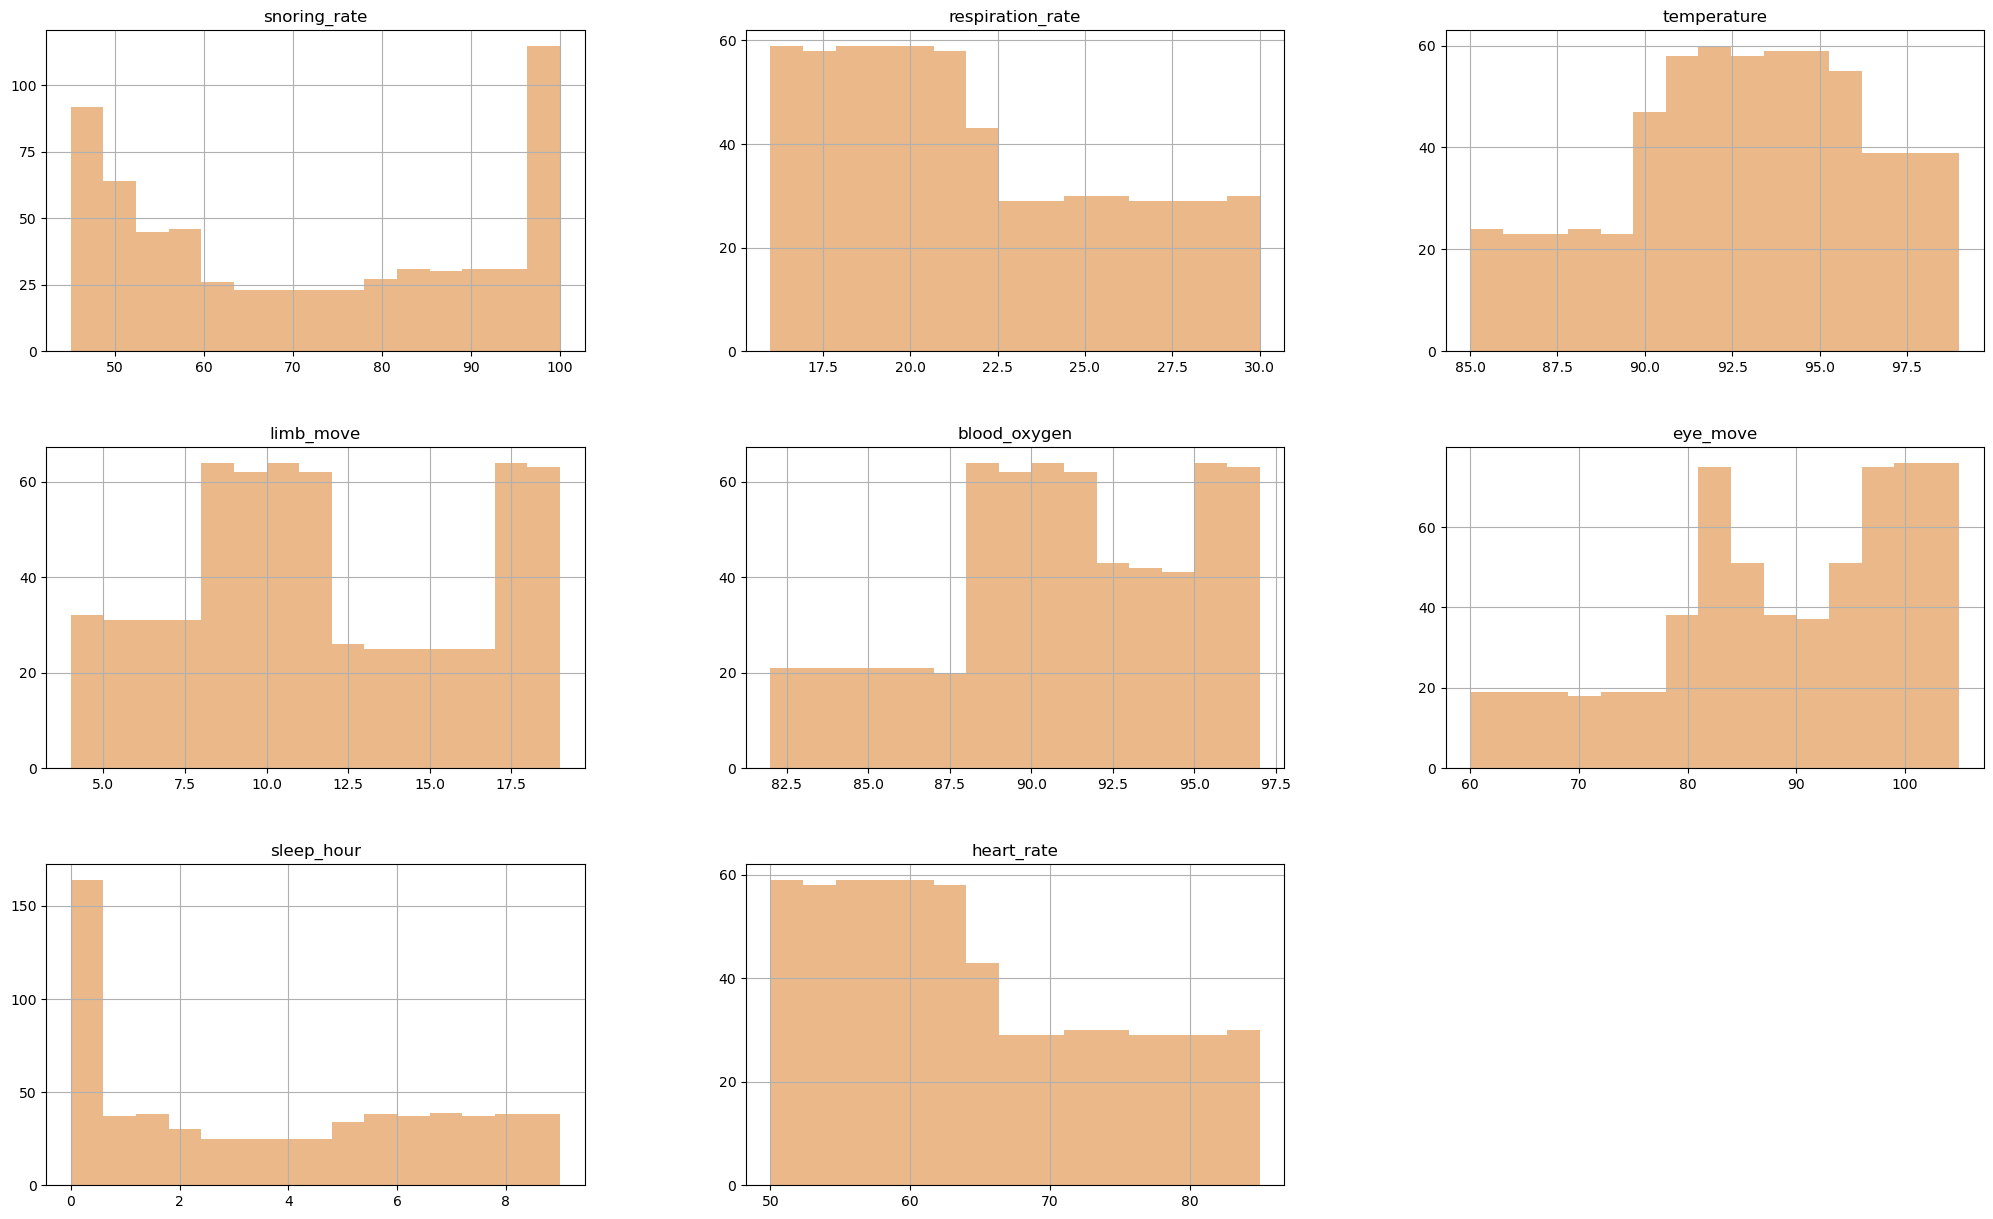

In [17]:
df.columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate', 'stress_level']
color = '#eab889'
data = df.copy()
data.drop('stress_level', axis = 1, inplace = True)
data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

Check the distribution of data from each column. It can be stated that the distribution of data from the features snoring_rate, respiration_rate, eye_move, sleep_hour, and heart_rate has an abnormal distribution. The distribution of data from the temperature, limb_move, and blood_oxygen features has a normal distribution.

TypeError: pointplot() got an unexpected keyword argument 'alpha'

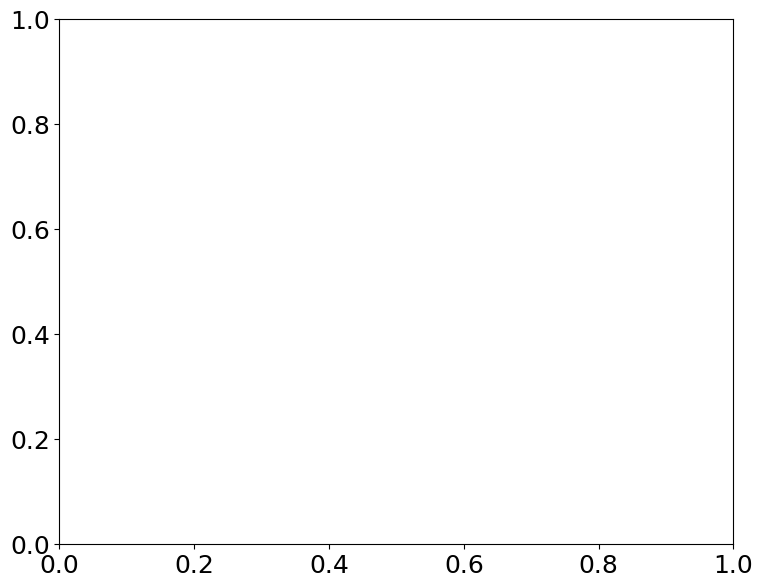

In [18]:
fig = plt.figure(figsize=(40, 15))
rows = 2
columns = 4
for i in range(len(df.columns[:-1])):
  fig.add_subplot(rows, columns, (i+1))
  img = sns.pointplot(x='stress_level',y=df.columns[i],data=df,color='lime',alpha=0.8)
plt.show()

Checking feature relationship with stress level. In the snoring_rate, respiration_rate, limb_movement, eye_move, and heart_rate features, the higher the value, the higher the stress level. In the temperature, blood_oxygen, and sleep_hour features, the lower the value, the higher the stress_level value.

In [ ]:
plt.figure(figsize = (17,10))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')
plt.title('Correlation', fontsize = 20)
plt.show()

Check the correlation between features. it can be seen that all features have a very strong correlation, where if the correlation value is equal to 1, then the correlation is positive. If the correlation value is equal to -1, then the correlation is negative.

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Check whether there are outlier data in each column in the data. It can be seen that there are no outliers in the data.

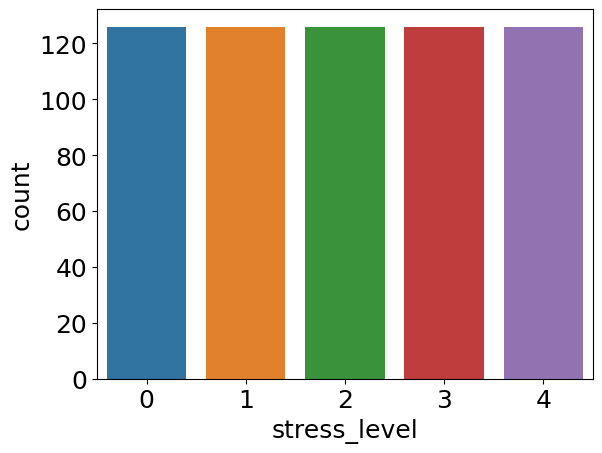

In [19]:
sns.countplot(x="stress_level", data =df)
plt.show()

See the target comparison or stress level in the data. It can be stated that the targets in the data are balanced so no sampling is necessary.

# Data Preparation

Because the data looks very good, then just do normalization.

In [20]:
x = df.copy();
x.drop('stress_level', axis = 1, inplace = True)
y = df['stress_level']

Separating the output or target from the data, then the features of the data are entered in the x variable and the output/target of the data is entered in the y variable.

In [21]:
x = minmax_scale(x)

Normalize data features using minmax.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state =123)

Separating training data and testing data with a ratio of 80%:20%.

In [23]:
# Showing data after pre processed
data_preprocessed = pd.DataFrame(x, columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate'])
data_preprocessed['stress_level'] = y
data_preprocessed.head()

,snoring_rate,respiration_rate,temperature,limb_move,blood_oxygen,eye_move,sleep_hour,heart_rate,stress_level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


# Modeling

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [25]:
# Doing Cross Validation and find hyperparameter
from pandas.core.common import random_state
k = [5,10,15]
max_depth = [20, 40, 60]
for i in range(3):
    models = []
    models.append(('KNN', KNeighborsClassifier(n_neighbors=k[i])))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier(max_depth=max_depth[i], random_state=101)))
    results = []
    names = []
    print("K:",k[i], "and max_depth:", max_depth[i])
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("")

K: 5 and max_depth: 20
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)

K: 10 and max_depth: 40
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)

K: 15 and max_depth: 60
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)



Hyperparameter search for KNN and DT models. In KNN testing of the hyperparameter values of K 5, 10, and 15 produced the same accuracy values. Therefore the chosen value of K is 5.

In DT, the hyperparameter test with max_depth values of 20, 40, and 60 produces the same accuracy value. Therefore, the max_depth value is chosen to be 40.

In [26]:
# Create K-NN Model
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
predict_KNN = model_KNN.predict(X_test)

In [27]:
# Create NB Model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predict_NB = model_NB.predict(X_test)

In [28]:
# Create DT Model
model_DT = DecisionTreeClassifier(max_depth=40,random_state=101)
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)

# Evaluation

## K-NN

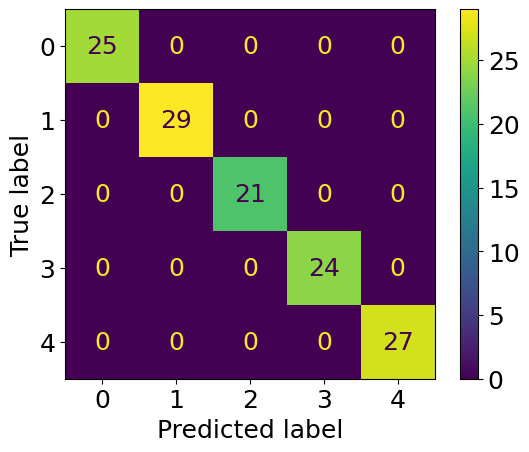

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_KNN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()

In [30]:
print(classification_report(y_test, predict_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Naive Bayes

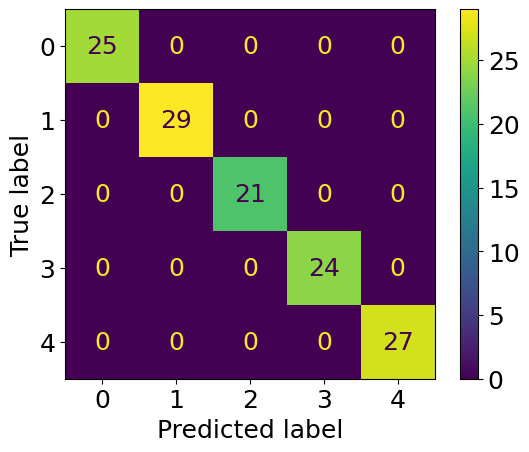

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_NB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()

In [32]:
print(classification_report(y_test, predict_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Decision Tree

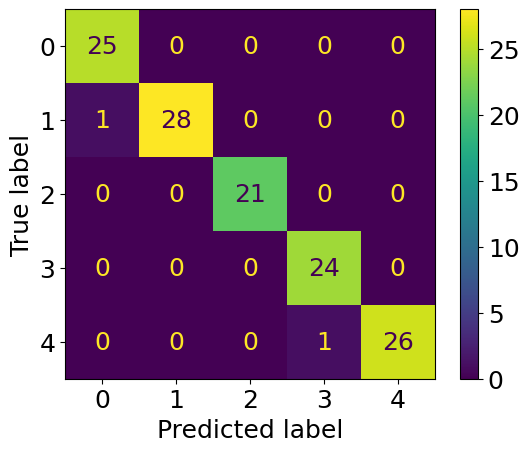

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_DT)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()

In [34]:
print(classification_report(y_test, predict_DT))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        21
           3       0.96      1.00      0.98        24
           4       1.00      0.96      0.98        27

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



# Conclusion

For all the models that have been made it is very good because it gets high accuracy. Where the K-NN and Naive Bayes models get an accuracy of 100%, while the Decision Tree model gets an accuracy of 98%. To improve the model that has been made, when searching for hyperparameters for the range, multiply it again so that you get the optimal hyperparameter.